### 1. Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Dataset

In [ ]:
# Memuat dataset dengan delimiter ';'
df = pd.read_csv('/content/hipertensi2label.csv', delimiter=';')


In [ ]:
print(df.head())  # Melihat 5 data teratas
print(df.info())  # Melihat informasi dasar tentang data
print(df.describe())  # Melihat statistik dasar dari data

   id  sistolik  diastolik  jk  umur  diabetes  diagnosis
0   1       120         80   1    61         0          2
1   2       110         80   1    61         0          2
2   3       170         80   1    74         0          1
3   4       120         80   1    58         0          2
4   5       140         80   1    63         0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         166 non-null    int64
 1   sistolik   166 non-null    int64
 2   diastolik  166 non-null    int64
 3   jk         166 non-null    int64
 4   umur       166 non-null    int64
 5   diabetes   166 non-null    int64
 6   diagnosis  166 non-null    int64
dtypes: int64(7)
memory usage: 9.2 KB
None
               id    sistolik   diastolik          jk        umur    diabetes  \
count  166.000000  166.000000  166.000000  166.000000  166.000000  166.000000   
m

### 3. Preprocessing

In [ ]:
print(df.columns)  # Melihat semua kolom dalam dataset


Index(['id', 'sistolik', 'diastolik', 'jk', 'umur', 'diabetes', 'diagnosis'], dtype='object')


In [ ]:
# Menghapus kolom 'id' karena tidak relevan untuk proses klasifikasi
df = df.drop('id', axis=1)

In [ ]:
# Memisahkan dataset menjadi fitur (X) dan label (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
# Membagi dataset menjadi data training (80%) dan data testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(df.isnull().sum())  # Menunjukkan jumlah nilai kosong di setiap kolom
print(df[df.isna().any(axis=1)])  # Menampilkan baris yang mengandung nilai kosong atau tidak valid


sistolik     0
diastolik    0
jk           0
umur         0
diabetes     0
diagnosis    0
dtype: int64
Empty DataFrame
Columns: [sistolik, diastolik, jk, umur, diabetes, diagnosis]
Index: []


In [ ]:
print(df.head())  # Melihat 5 data teratas

   sistolik  diastolik  jk  umur  diabetes  diagnosis
0       120         80   1    61         0          2
1       110         80   1    61         0          2
2       170         80   1    74         0          1
3       120         80   1    58         0          2
4       140         80   1    63         0          1


In [ ]:
# Melakukan standarisasi fitur karena SVM sensitif terhadap skala fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np

# Mengecek jumlah NaN di setiap kolom pada array numpy
print(np.isnan(X_train).sum())  # Menampilkan total jumlah NaN di seluruh array
print(np.isnan(X_train).sum(axis=0))  # Menampilkan jumlah NaN di setiap kolom


1
[0 0 1 0 0]


In [ ]:
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi 'mean' (bisa diganti dengan 'median' atau 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada X_train dan X_test
X_train = imputer.fit_transform(X_train)  # Mengisi NaN dengan mean pada data training
X_test = imputer.transform(X_test)  # Mengisi NaN dengan mean pada data testing


In [ ]:
import numpy as np
print(np.isnan(X_train).sum())  # Menampilkan total jumlah NaN di seluruh array
print(np.isnan(X_train).sum(axis=0))  # Menampilkan jumlah NaN di setiap kolom

0
[0 0 0 0 0]


### 4. Pembuatan Model

In [ ]:
# Membuat model K-NN dengan jumlah tetangga default
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2 3]
 [4 8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.40      0.36         5
           2       0.73      0.67      0.70        12

    accuracy                           0.59        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.61      0.59      0.60        17



### 6. Evaluasi Model

In [ ]:
# Menghitung dan menampilkan metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Confusion Matrix:
 [[2 3]
 [4 8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.40      0.36         5
           2       0.73      0.67      0.70        12

    accuracy                           0.59        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.61      0.59      0.60        17

Accuracy: 0.59
Precision: 0.61
Recall: 0.59
F1-Score: 0.60


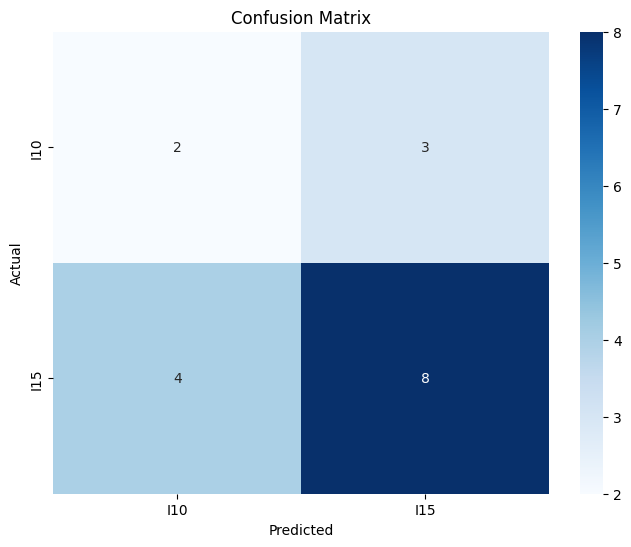

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['I10', 'I15'], yticklabels=['I10', 'I15'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
